#De opdracht

## Beschrijving 
Het doel van Bit Bikes is om in juli 2023 zo vaak mogelijk te verhuren.

Je gaat Bit Bikes voorspellingen en concrete adviezen geven om dit te bewerkstelligen. (natuurlijk met data onderbouwd)

Voor je advies en voorspellingen aan Bit Bikes behandel je minstens de volgende onderwerpen:

Membership
De fietstypes
Het bedrijf wil ook weten hoeveel fietsen ze voor komend jaar moeten hebben? Moeten er fietsen gekocht/verkocht worden?

De eerste stap is het exploreren van je data. Per onderwerp kan je bekijken hoe je dat wil visualiseren.

Maak een of meerdere visualisaties per onderwerp, geef bij al je visualisaties aan waarom je voor deze visualisatie hebt gekozen.
Schrijf vervolgens per onderwerp jouw interpretatie van de data. Wat blijkt er uit de data?
Maak tot slot je advies op voor Bit Bikes en presenteer dit aan het einde van je notebook.


## Doel

Het doel van Bit Bikes is om in juli 2023 zo vaak mogelijk te verhuren.

Je gaat Bit Bikes voorspellingen en concrete adviezen geven om dit te bewerkstelligen. (natuurlijk met data onderbouwd)

Voor je advies en voorspellingen aan Bit Bikes behandel je minstens de volgende onderwerpen:

Membership
De fietstypes
Het bedrijf wil ook weten hoeveel fietsen ze voor komend jaar moeten hebben? Moeten er fietsen gekocht/verkocht worden?

De eerste stap is het exploreren van je data. Per onderwerp kan je bekijken hoe je dat wil visualiseren.

Maak een of meerdere visualisaties per onderwerp, geef bij al je visualisaties aan waarom je voor deze visualisatie hebt gekozen.
Schrijf vervolgens per onderwerp jouw interpretatie van de data. Wat blijkt er uit de data?
Maak tot slot je advies op voor Bit Bikes en presenteer dit aan het einde van je notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lees de data in
df_2020 = pd.read_csv('divvy-tripdata/202007-divvy-tripdata.csv')
df_2020['year'] = 2020

df_2021 = pd.read_csv('divvy-tripdata/202107-divvy-tripdata.csv')
df_2021['year'] = 2021

df_2022 = pd.read_csv('divvy-tripdata/202207-divvy-tripdata.csv')
df_2022['year'] = 2022

#Data cleaning (date converting)
df_2020[['started_at', 'ended_at']] = df_2020[['started_at', 'ended_at']].apply(pd.to_datetime, format='%d/%m/%Y %H:%M') 
df_2021[['started_at', 'ended_at']] = df_2021[['started_at', 'ended_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S') 
df_2022[['started_at', 'ended_at']] = df_2022[['started_at', 'ended_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S') 
#df_2020['started_at'] = pd.to_datetime(df_2020['started_at'], format='%d/%m/%Y %H:%M')
#df_2020.sort_values(by=['started_at'], inplace=True, ascending=True)

df_all = pd.concat([df_2020, df_2021, df_2022])

df_all.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2197378 entries, 0 to 823487
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year                int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 251.5+ MB


# Membership

Laten we eens een kijkje nemen naar de aantal ritten die in de afgelopen jaren van Juli zijn gemaakt en de verdeling ervan tussen klanten met een membership en zonder

Text(0, 0.5, 'Aantal ritten')

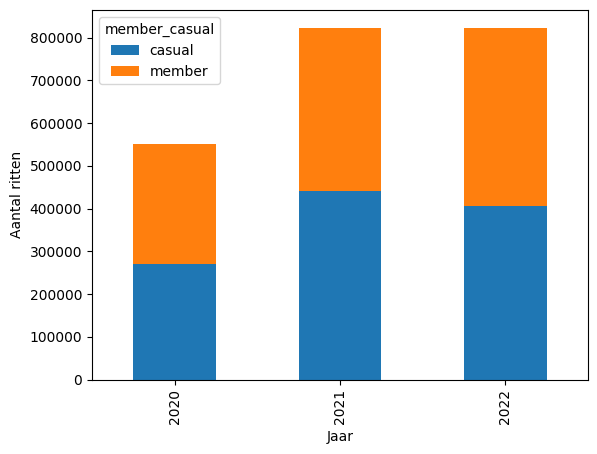

In [3]:
df_all.groupby(['year', 'member_casual']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.xlabel('Jaar')
plt.ylabel('Aantal ritten')

De verdeling over de membership is over de 3 jaar redelijk gebleven op 50%, met een lichte daling in 2021 en een lichte stijging in 2022. Wel opmerkelijk is de 45% stijging in het aantal ritten van 2020 naar 2021. Maar omdat het in 2022 gelijk is gebleven. Met alleen drie maanden uit elk jaar is het moeilijk vast te stellen wat de trend momenteel is bij de aantal ritten. 

Dus lijkt het me dat we moeten gaan visualieren waar de meeste members aan hun ritten beginnen.

c:\Users\nktak\Projects\bit-academy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


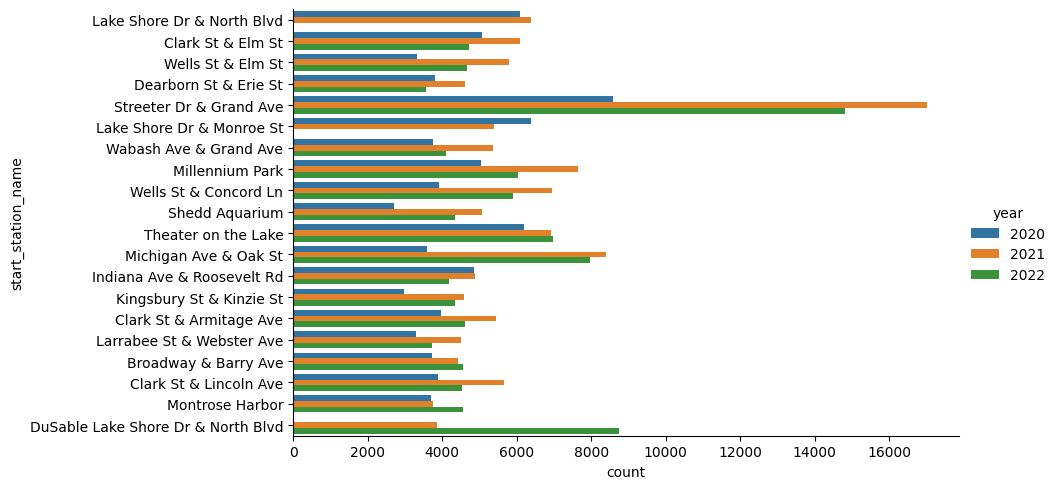

In [12]:
top20_stations = df_all.groupby('start_station_name')['start_station_name'].value_counts().nlargest(20)


df_sname_year = df_all[df_all["start_station_name"].isin(top20_stations.index)][['start_station_name', 'member_casual', 'year']]

sns.catplot(data=df_sname_year, y='start_station_name', hue='year', kind='count', aspect=2)

# Fiets types

asdf

In [5]:
#pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D')
#plt.figure(figsize=(10, 10))

"""
sns.histplot(
    x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), 
    y=df_all.groupby(df_all['started_at'].dt.date)['started_at'].size())
"""

"\nsns.histplot(\n    x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), \n    y=df_all.groupby(df_all['started_at'].dt.date)['started_at'].size())\n"

In [6]:
"""
# Line plot for amount of hires per day
#df_2020['started_at'].max()

plt.figure(figsize=(10,10))

sns.lineplot(x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), y=df_all.groupby(df_all['started_at'].dt.date).size())

"""


"\n# Line plot for amount of hires per day\n#df_2020['started_at'].max()\n\nplt.figure(figsize=(10,10))\n\nsns.lineplot(x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), y=df_all.groupby(df_all['started_at'].dt.date).size())\n\n"